# Maximum likehood estimation

## Import libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("science")
np.random.seed = 123

## Generate dataset

In [2]:
n = 10
x = 10 * np.random.rand(n)
y = 2 * x + np.random.randn(n)

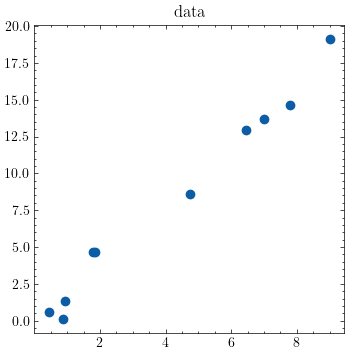

In [3]:
fig = plt.figure(figsize = (4, 4))
plt.scatter(x, y)
plt.title("data")
plt.show()

## The likehood for linear regression

Let $y_i \sim N(x_i^T \Theta, \sigma^2) = x_i^T \Theta + N(0, \sigma^2)$ 

The likehood to maximize

$$p(y/X,\Theta, \sigma) = \prod_{i=1}^{n} p(y_i/x_i, \Theta, \sigma)
                        = (2\pi\sigma^2)^{-n/2} \exp^{-\frac{1}{2\sigma^2}(y-X\Theta)^T(y-X\Theta)}$$

Objective function to minimize

$$J(\Theta) = \sum_{i=1}^{n}(y_i - x_i^T \Theta)^2$$

## MLE Estimate for $\Theta$

log-likehood $l(\Theta) = \log p(y / X, \Theta, \sigma)$ 

$$l(\Theta) = -\frac{n}{2} \log (2\pi\sigma^2) - \frac{1}{2\sigma^2}(y-x\Theta)^T(y-X\Theta)$$

$\partial l(\Theta) /  \partial \Theta = 0$ gives $-\frac{1}{2\sigma^2} [-2X^Ty + 2X^TX\Theta] = 0$

$$\hat{\Theta}_{ML} = (X^TX)^{-1}X^Ty$$

In [4]:
X = np.ones((n, 2))
for i in range(n):
    X[i][1] = x[i]
X

array([[1.        , 6.45897565],
       [1.        , 9.02641146],
       [1.        , 0.43237584],
       [1.        , 0.85842474],
       [1.        , 4.74418319],
       [1.        , 7.00438569],
       [1.        , 1.85634471],
       [1.        , 1.79102015],
       [1.        , 0.93457875],
       [1.        , 7.78914655]])

In [5]:
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
theta_hat

array([-0.29808312,  2.03838205])

**Visual checking**

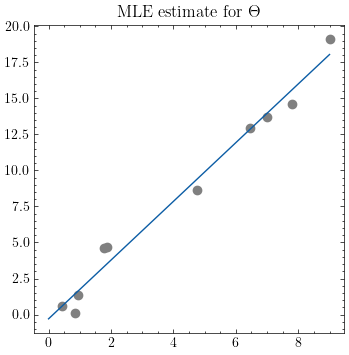

In [6]:
fig = plt.figure(figsize = (4, 4))
plt.scatter(x, y, color = "grey")
line_x = np.arange(10)
line_ = theta_hat[1] * line_x + theta_hat[0]
plt.plot(line_)
plt.title("MLE estimate for $\Theta$")
plt.show()

## MLE Estimate for $\sigma$

log-likehood $l(\Theta) = \log p(y / X, \Theta, \sigma)$ 

$$l(\sigma) = -\frac{n}{2} \log (2\pi\sigma^2) - \frac{1}{2\sigma^2}(y-x\Theta)^T(y-X\Theta)$$

$\partial l(\sigma) /  \partial \sigma = 0$ gives 
$\frac{1}{n} (y-X\Theta)^T(y-X\Theta) = 1/n \sum_{i=1}^{n} (y_i - x_i^T\Theta)$

$$\hat{\sigma}_{ML} = \frac{1}{n} (y-X\Theta)^T(y-X\Theta)$$

In [7]:
sigma_hat = 1/n * (y - X @ theta_hat).T @ (y - X @ theta_hat)
sigma_hat

0.7493246777838546